In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_data = pd.read_csv("nyc_housing_base.csv")

In [3]:
# Clean data
cleaned_data = base_data.drop_duplicates()
cleaned_data = base_data.drop("borough_x", axis=1)

In [16]:
# Extract building class letter (first character)
cleaned_data["bldg_class_letter"] = cleaned_data["bldgclass"].str[0]

# Get unique building class letters
bldg_letters = sorted(cleaned_data["bldg_class_letter"].unique())
bldg_avg_ppa = []

for letter in bldg_letters:
    # Get data for this building class letter
    letter_data = cleaned_data[cleaned_data["bldg_class_letter"] == letter]
    # Filter for residential buildings with non-zero residential area
    res_data = letter_data.query("resarea > 0 and comarea == 0")
    # Calculate average price per area
    if len(res_data) > 0:
        ppa = res_data["sale_price"] / res_data["bldgarea"]
        bldg_avg_ppa.append(ppa.mean())
    else:
        bldg_avg_ppa.append(0)

In [ ]:
bldg_avg_ppa = np.array(bldg_avg_ppa)
bldg_letters = np.array(bldg_letters)
mask = bldg_avg_ppa != 0
bldg_letters = bldg_letters[mask]
bldg_avg_ppa = bldg_avg_ppa[mask]

TypeError: only integer scalar arrays can be converted to a scalar index

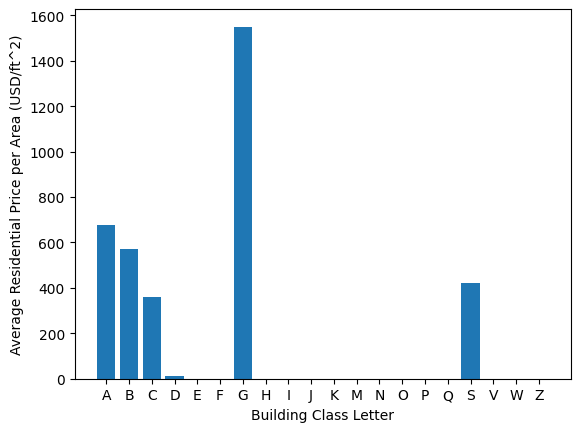

In [17]:
plt.bar(bldg_letters, bldg_avg_ppa)
plt.xlabel("Building Class Letter")
plt.ylabel("Average Residential Price per Area (USD/ft^2)")
plt.show()